# import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
%matplotlib inline

In [2]:
myzip=ZipFile('data.zip')
file_data_all =myzip.open('COVID-19 Cases.csv')
file_data_US =myzip.open('cases_us.csv')
file_data_CO =myzip.open('cases_co.csv')
file_data_W =myzip.open('cases_western.csv')
file_data_E =myzip.open('cases_eastern.csv')

In [3]:
data_all = pd.read_csv(file_data_all,parse_dates=['Date'])
data_US = pd.read_csv(file_data_US)
data_CO = pd.read_csv(file_data_CO)
data_W = pd.read_csv(file_data_W)
data_E = pd.read_csv(file_data_E)

In [4]:
weekly = pd.date_range(start='2020-01-22',end='2020-04-10',freq='W')

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png"
align="center" />

# Outline:

## Current situation: (which states are suffering)

### Confirmed cases

In [5]:
confirmed_World = data_all[data_all['Case_Type']=='Confirmed']
confirmed_US = data_US[data_US['Case_Type']=='Confirmed']
confirmed_CO = data_CO[data_CO['Case_Type']=='Confirmed']
confirmed_W = data_W[data_W['Case_Type']=='Confirmed']
confirmed_E = data_E[data_E['Case_Type']=='Confirmed']

confirmed_World_daily = confirmed_World.groupby(['Date'])['Cases'].sum()
confirmed_US_daily = confirmed_US.groupby(['Date'])['Cases'].sum()
confirmed_CO_daily = confirmed_CO.groupby(['Date'])['Cases'].sum()
confirmed_W_daily = confirmed_W.groupby(['Date'])['Cases'].sum()
confirmed_E_daily = confirmed_E.groupby(['Date'])['Cases'].sum()

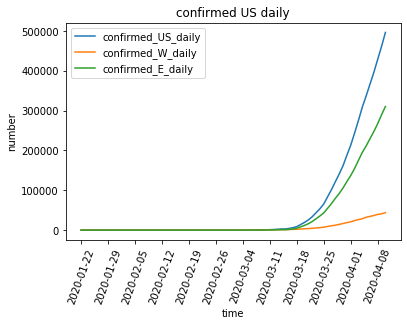

In [6]:
plt.figure()
plt.plot(confirmed_US_daily,label='confirmed_US_daily')
plt.plot(confirmed_W_daily,label='confirmed_W_daily')
plt.plot(confirmed_E_daily,label='confirmed_E_daily')

plt.xlabel("time")
plt.ylabel("number")
plt.title("confirmed US daily")
plt.xticks(range(0,80,7),rotation=70)
plt.legend()
plt.show()

Deaths cases

In [7]:
deaths_US = data_US[data_US['Case_Type']=='Deaths']
deaths_CO = data_CO[data_CO['Case_Type']=='Deaths']
deaths_W = data_W[data_W['Case_Type']=='Deaths']
deaths_E = data_E[data_E['Case_Type']=='Deaths']

deaths_US_daily = deaths_US.groupby(['Date'])['Cases'].sum()
deaths_CO_daily = deaths_CO.groupby(['Date'])['Cases'].sum()
deaths_W_daily = deaths_W.groupby(['Date'])['Cases'].sum()
deaths_E_daily = deaths_E.groupby(['Date'])['Cases'].sum()

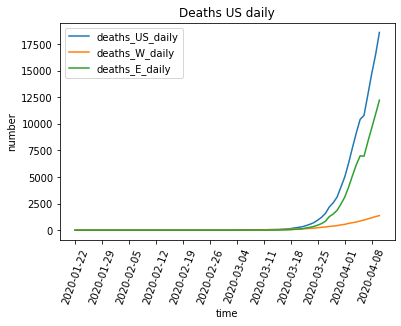

In [8]:
plt.figure()
plt.plot(deaths_US_daily,label='deaths_US_daily')
plt.plot(deaths_W_daily,label='deaths_W_daily')
plt.plot(deaths_E_daily,label='deaths_E_daily')

plt.xlabel("time")
plt.ylabel("number")
plt.xticks(range(0,80,7),rotation=70)
plt.title("Deaths US daily")
plt.legend()
plt.show()

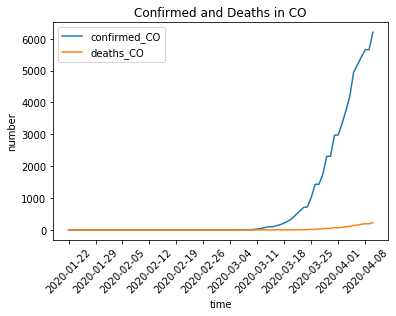

In [9]:
plt.figure()
plt.plot(confirmed_CO_daily,label='confirmed_CO')
plt.plot(deaths_CO_daily,label='deaths_CO')

plt.xlabel("time")
plt.ylabel("number")
plt.title("Confirmed and Deaths in CO")
plt.xticks(range(0,80,7),rotation=45)
plt.legend()
plt.show()

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

# Analysis:


# Data Description 

### 1.Colorado data: daily confirmed cases and deaths in each county

In [10]:
data_CO.groupby(['Date','Admin2','Case_Type'])[['Cases']].sum()

Cases
Date       Admin2     Case_Type       
2020-01-22 Adams      Confirmed      0
                      Deaths         0
           Alamosa    Confirmed      0
                      Deaths         0
           Arapahoe   Confirmed      0
...                                ...
2020-04-10 Washington Deaths         0
           Weld       Confirmed    614
                      Deaths        30
           Yuma       Confirmed      2
                      Deaths         0

[10560 rows x 1 columns]

### 2.Colorado data: weekly confirmed cases and deaths in each county

In [11]:
data_CO['Date'] = pd.to_datetime(data_CO['Date'])
CO_weekly = data_CO[data_CO['Date'].isin(weekly)]

pvtable_CO = pd.pivot_table(data=CO_weekly, index=['Date','Admin2','Case_Type'], values=['Cases'], aggfunc='sum')
pvtable_CO

Cases
Date       Admin2     Case_Type       
2020-01-26 Adams      Confirmed      0
                      Deaths         0
           Alamosa    Confirmed      0
                      Deaths         0
           Arapahoe   Confirmed      0
...                                ...
2020-04-05 Washington Deaths         0
           Weld       Confirmed    470
                      Deaths        24
           Yuma       Confirmed      2
                      Deaths         0

[1452 rows x 1 columns]

In [12]:
World_0410 = data_all[data_all['Date']=='2020-04-10']
CO_0410 = data_CO[data_CO['Date']=='2020-04-10']
US_0410 = data_US[data_US['Date']=='2020-04-10']
western_0410 = data_W[data_W['Date']=='2020-04-10']
eastern_0410 = data_E[data_E['Date']=='2020-04-10']

### 3.Colorado data: total confirmed cases and deaths in each county

In [13]:
CO_0410agg = CO_0410.groupby(['Admin2','Case_Type'])[['Cases']].sum()
CO_0410agg

Cases
Admin2     Case_Type       
Adams      Confirmed    475
           Deaths        14
Alamosa    Confirmed      5
           Deaths         0
Arapahoe   Confirmed    877
...                     ...
Washington Deaths         0
Weld       Confirmed    614
           Deaths        30
Yuma       Confirmed      2
           Deaths         0

[132 rows x 1 columns]

### 4.US data: total confirmed cases and deaths in each state 

In [14]:
US_0410.groupby(['Province_State','Case_Type'])[['Cases']].sum()

Cases
Province_State Case_Type       
Alabama        Confirmed   2947
               Deaths        80
Alaska         Confirmed    246
               Deaths         7
American Samoa Confirmed      0
...                         ...
West Virginia  Deaths         5
Wisconsin      Confirmed   3068
               Deaths       128
Wyoming        Confirmed    239
               Deaths         0

[112 rows x 1 columns]

<img src="http://pictes.oss-cn-beijing.aliyuncs.com/microclass-virtualisation/week1correlation/line4.png" align="center" />

# Maps & Plots:

## World Map

In [15]:
import folium
from folium.plugins import HeatMap

confirmed_World_0410 = World_0410[World_0410['Case_Type'] == 'Confirmed']
confirmed_World_0410 = confirmed_World_0410.dropna(subset=['Lat', 'Long'])

World_map = folium.Map(location=[37, -10], zoom_start=2)
heatdata = confirmed_World_0410[['Lat','Long']].values.tolist()
HeatMap(heatdata).add_to(World_map)
World_map

## USA Map

In [16]:
from folium import plugins

confirmed_US_0410 = US_0410[US_0410['Case_Type']=='Confirmed']
confirmed_STATE_0410_counts = confirmed_US_0410.groupby(['Province_State']).sum().reset_index()[['Province_State','Cases']]

us_map = folium.Map(location=[37, -100], zoom_start=4)
incidents = plugins.MarkerCluster().add_to(us_map)
for lat, lng, label, in zip(confirmed_US_0410.Lat, confirmed_US_0410.Long, confirmed_US_0410.Cases):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)
us_map.add_child(incidents)

In [17]:
from pandas import Series,DataFrame
import pandas as pd
import datetime

State = {
'states' : ['Alabama','Alaska','Arizona','Arkansas','California','Colorado',
        'Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho',
        'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana',
         'Maine','Maryland','Massachusetts','Michigan','Minnesota',
         'Mississippi','Missouri','Montana','Nebraska','Nevada',
         'New Hampshire','New Jersey','New Mexico','New York',
         'North Carolina','North Dakota','Ohio','Oklahoma','Oregon',
         'Pennsylvania','Rhode Island','South Carolina','South Dakota',
         'Tennessee','Texas','Utah','Vermont','Virginia','Washington',
         'West Virginia','Wisconsin','Wyoming'],
'Code' : ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA',
        'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
        'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT',
        'VA','WA','WV','WI','WY']
}
State = DataFrame(State)
cumulative_us = data_US.groupby([ "Province_State","Date",'Case_Type'])["Cases"].sum().reset_index()
cumulative_us = cumulative_us[cumulative_us['Case_Type'] == 'Confirmed'].reset_index(drop=True)
cumulative_us = cumulative_us[cumulative_us['Province_State'].isin(State.states)].reset_index(drop=True)
cumulative_us['code'] = State.Code.repeat(80).reset_index(drop=True)
cumulative_us = cumulative_us.sort_values('Date').reset_index(drop=True)
cumulative_us["Date"] = pd.to_datetime(cumulative_us["Date"] , format="%Y-%m-%d").dt.date
start_date = datetime.date(2020, 3, 17)
cumulative_us = cumulative_us[cumulative_us["Date"]>=start_date].reset_index(drop=True)
cumulative_us["Date"] = cumulative_us["Date"].astype(str)

import os
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
fig = px.choropleth(locations=cumulative_us["code"],
                    color=cumulative_us["Cases"], 
                    locationmode="USA-states",
                    scope="usa",
                    animation_frame=cumulative_us["Date"],
                    color_continuous_scale='Reds',
                    range_color=[0,50000]
                   )

layout = go.Layout(
    title=go.layout.Title(
        text="Cumulative count of COVID-19 cases in US",
        x=0.5
    ),
    font=dict(size=14),
)

fig.update_layout(layout)
fig.show()

In [18]:
import plotly.graph_objects as go

states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado',
        'Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho',
        'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana',
         'Maine','Maryland','Massachusetts','Michigan','Minnesota',
         'Mississippi','Missouri','Montana','Nebraska','Nevada',
         'New Hampshire','New Jersey','New Mexico','New York',
         'North Carolina','North Dakota','Ohio','Oklahoma','Oregon',
         'Pennsylvania','Rhode Island','South Carolina','South Dakota',
         'Tennessee','Texas','Utah','Vermont','Virginia','Washington',
         'West Virginia','Wisconsin','Wyoming']
confirmed_50STATE_0410_counts = confirmed_STATE_0410_counts[confirmed_STATE_0410_counts['Province_State'].isin(states)]
confirmed_50STATE_0410_counts = confirmed_50STATE_0410_counts.sort_values('Province_State', inplace=False)
confirmed_50STATE_0410_counts.reset_index(drop=True,inplace=True)
confirmed_50STATE_0410_counts['code'] = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA',
                                         'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
                                         'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT',
                                         'VA','WA','WV','WI','WY']

fig = go.Figure(data=go.Choropleth( 
    locations=confirmed_50STATE_0410_counts['code'],
    z = confirmed_50STATE_0410_counts['Cases'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = "number", 
)) 
 
fig.update_layout( 
    title_text = 'Confirmed in US', 
    geo_scope='usa', 
) 

## Bar Plot

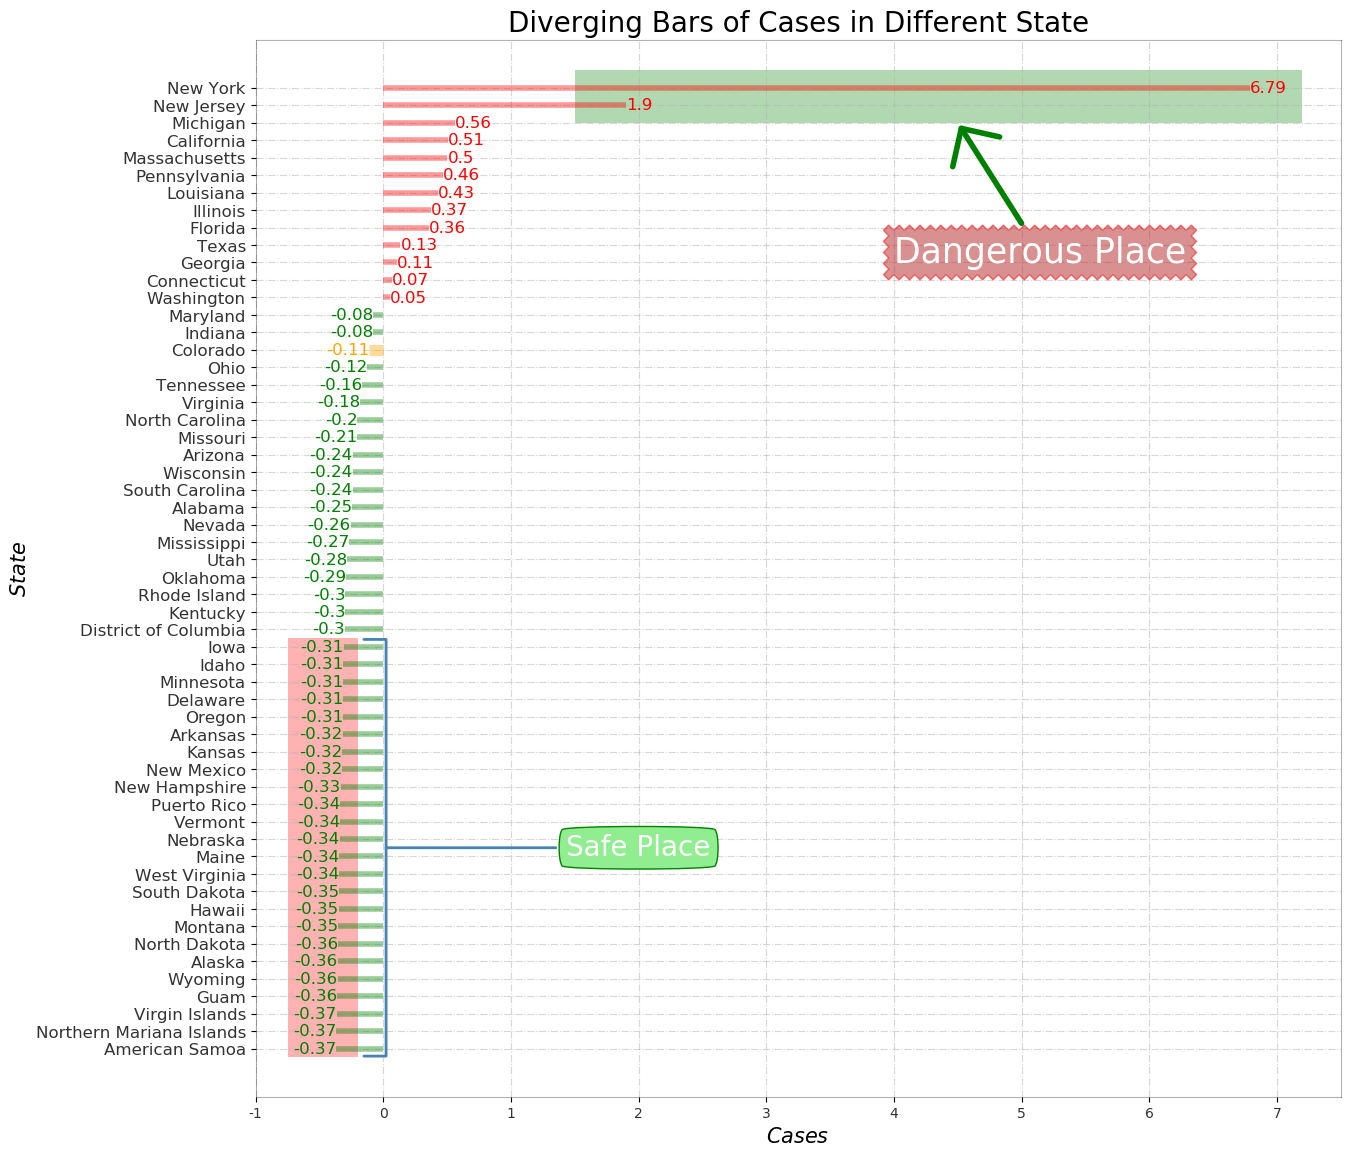

In [19]:
import matplotlib.patches as patches 
x = confirmed_STATE_0410_counts.loc[:,'Cases']
confirmed_STATE_0410_counts['count_z'] = (x - x.mean())/x.std() 
confirmed_STATE_0410_counts['colors'] = ['red' if i>0 else 'green' for i in confirmed_STATE_0410_counts['count_z']]
confirmed_STATE_0410_counts.sort_values('count_z', inplace=True)
confirmed_STATE_0410_counts.reset_index(drop=True,inplace=True)
confirmed_STATE_0410_counts.loc[confirmed_STATE_0410_counts.Province_State=='Colorado','colors'] = 'orange'

plt.figure(figsize=(14,14), dpi= 100)
plt.hlines(y=confirmed_STATE_0410_counts.Province_State, xmin=0, xmax=confirmed_STATE_0410_counts.count_z
           ,color=confirmed_STATE_0410_counts.colors
           ,alpha=0.4
           ,linewidth=[8 if i=='Colorado' else 4 for i in confirmed_STATE_0410_counts.Province_State]);

for i in range(confirmed_STATE_0410_counts.shape[0]):
    x = confirmed_STATE_0410_counts.count_z[i]                     
    y = confirmed_STATE_0410_counts.index[i]                     
    s = str(round(confirmed_STATE_0410_counts.count_z[i],2))      
    plt.text(x,y,s
             ,fontdict={'color':confirmed_STATE_0410_counts.colors[i],'size':12}         
             ,horizontalalignment='right' if x<0 else 'left'    
             ,verticalalignment='center') 

p1 = patches.Rectangle((1.5,53),width=5.7,height=3,facecolor='g',alpha=.3)
p2 = patches.Rectangle((-0.75,-0.5),width=.55,height=24,facecolor='r',alpha=.3)
plt.gca().add_patch(p1)
plt.gca().add_patch(p2)

plt.annotate('Dangerous Place',xy=(4.5,53),xytext=(4,45),color='w',fontsize=25,
             bbox = dict(boxstyle='sawtooth', fc='firebrick',ec='r',alpha=.5),
             arrowprops = dict(arrowstyle='->,head_length=0.8,head_width=0.8',lw=4,color='g'))
plt.annotate('Safe Place',xy=(0,11.5),xytext=(2,11.5),xycoords='data',
             color='w',fontsize=20,ha='center',va='center',
             bbox = dict(boxstyle='round4', fc='lightgreen',ec='g'),
             arrowprops = dict(arrowstyle='-[, widthB=7.5, lengthB=.8',lw=2,color='steelblue'))

plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.ylabel('$State$',fontsize=15)  
plt.xlabel('$Cases$',fontsize=15)
plt.yticks(fontsize=12,alpha=0.8)
plt.xticks(alpha=0.8)
plt.xlim(-1,7.5)
plt.title('Diverging Bars of Cases in Different State', fontdict={'size':20,'color':'k'})
plt.grid(linestyle='-.', alpha=0.5)

## Bubble Plot 

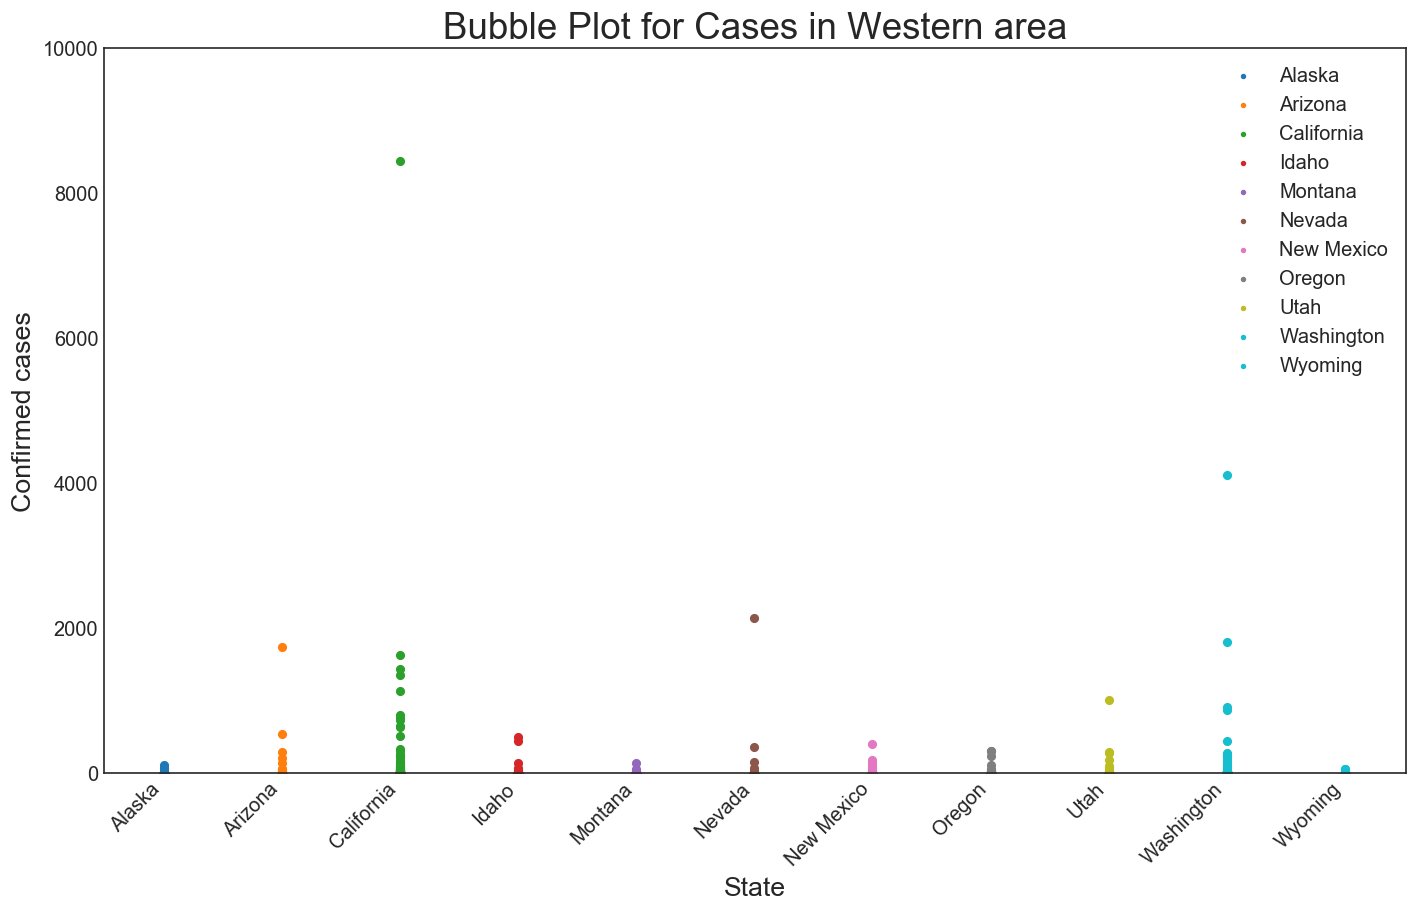

In [20]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

%matplotlib inline

deaths_W_0410 = deaths_W[deaths_W['Date']=='2020-04-10']
categories = np.unique(western_0410['Province_State'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

fig = plt.figure(figsize=(14,8), dpi=120, facecolor='w', edgecolor='k')    
for i, category in enumerate(categories):
    plt.scatter('Province_State', 'Cases', 
                data=western_0410.loc[western_0410.Province_State==category, :], 
                s=20, c=np.array(colors[i]).reshape(1,-1), label=str(category))
    
plt.gca().set(ylim=(0, 10000),
              xlabel='State', ylabel='Confirmed cases')
plt.xticks(np.unique(western_0410['Province_State']),fontsize=12,rotation=45,horizontalalignment='right')
plt.yticks(fontsize=12)
plt.title("Bubble Plot for Cases in Western area", fontsize=22)
plt.legend(fontsize=12
           ,markerscale=0.5)
plt.show()

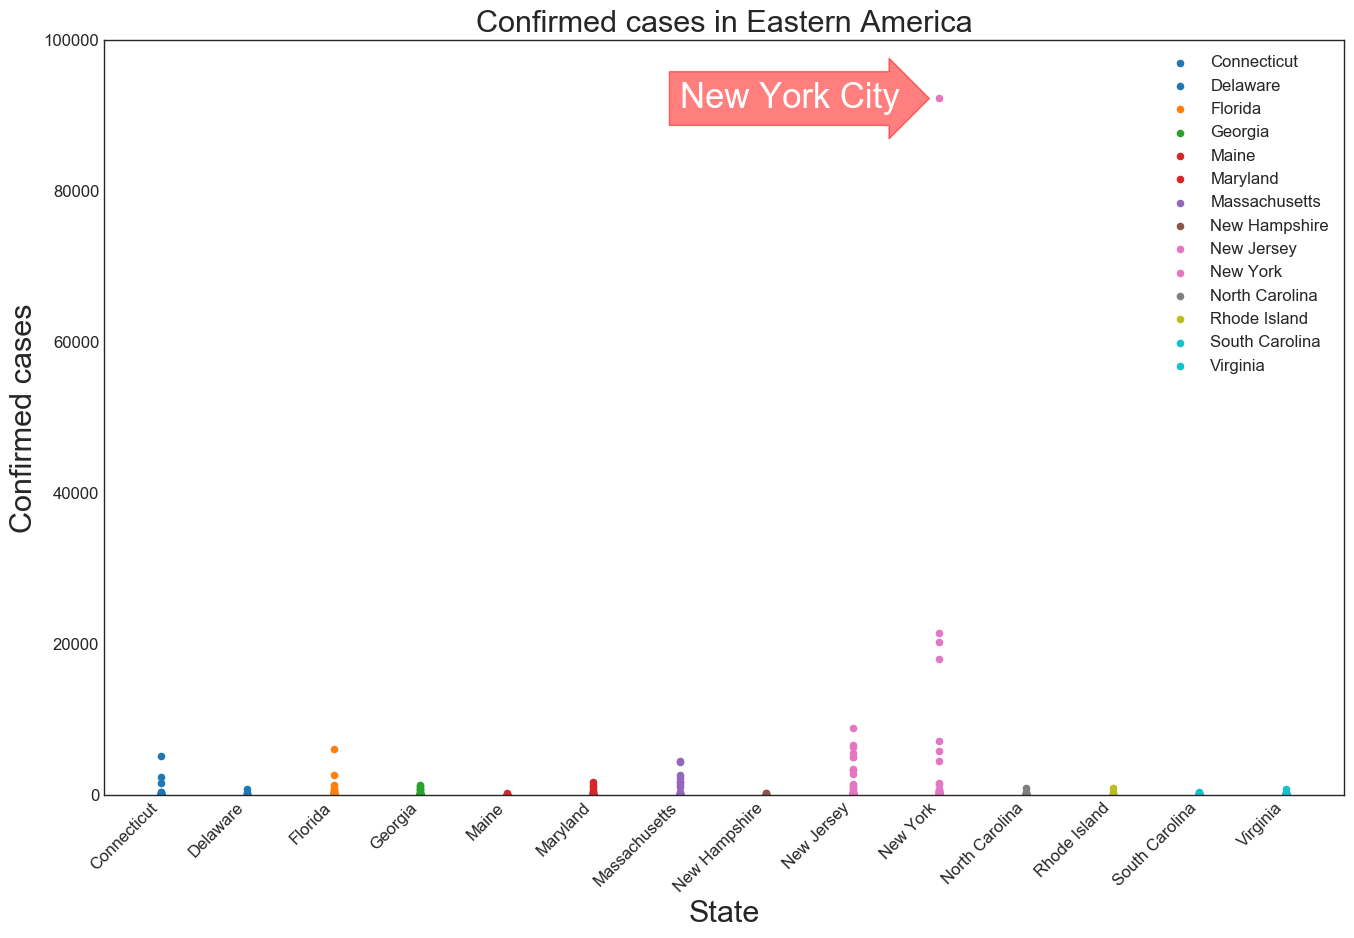

In [23]:
categories = np.unique(eastern_0410['Province_State'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

plt.figure(figsize=(16, 10)   
           , dpi=100         
           , facecolor='w'    
           , edgecolor='k'   
          )

for i, category in enumerate(categories):
    plt.scatter('Province_State', 'Cases', 
                data=eastern_0410.loc[eastern_0410.Province_State==category, :], 
                s=20, c=np.array(colors[i]).reshape(1,-1), label=str(category))

plt.annotate('New York City',xy=(9,100000),xytext=(6,91000),color='w',fontsize=25,
             bbox = dict(boxstyle='rarrow', fc='r',ec='r',alpha=.5))

plt.gca().set(ylim=(0, 100000))
plt.xticks(np.unique(eastern_0410['Province_State']),fontsize=12,rotation=45,horizontalalignment='right')
plt.yticks(fontsize=12)
plt.ylabel('Confirmed cases',fontsize=22)
plt.xlabel('State',fontsize=22)
plt.title("Confirmed cases in Eastern America", fontsize=22) 
plt.legend(fontsize=12)
plt.show()